# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the Dataset

In [3]:
data = pd.read_csv('Advertising.csv')

In [4]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#  Remove The Column

In [5]:
# Remove the 'Unnamed: 0' column as it's just an index
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Determine if ANY Value in a Series is Missing

In [7]:
data.isnull().values.any()

False

In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Cleaning

In [10]:
# No missing values found, so no further cleaning required.

# Data Visualization

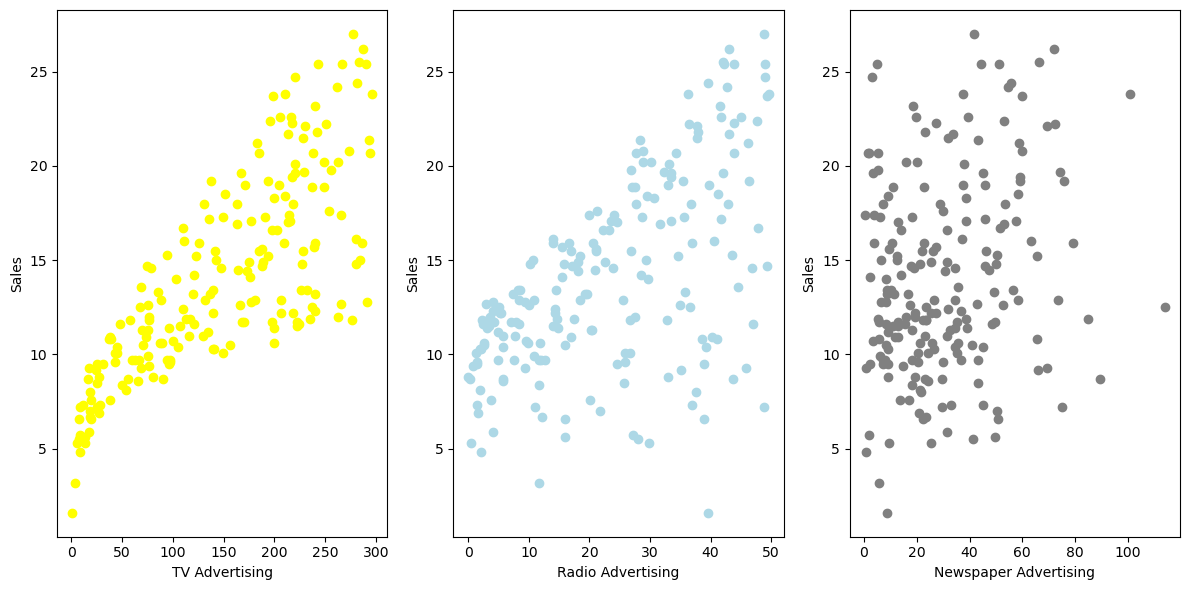

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(data['TV'], data['Sales'], color='yellow')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.subplot(1, 3, 2)
plt.scatter(data['Radio'], data['Sales'], color='lightblue')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.subplot(1, 3, 3)
plt.scatter(data['Newspaper'], data['Sales'], color='gray')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Features and Target

In [12]:
# Define features (X) and target (Y)
# Prepare the data
X = data[['TV', 'Radio', 'Newspaper']]
Y = data['Sales']

# Training and Testing the Dataset

In [13]:
# Split the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Linear Regression Classifier

In [14]:
# Build a Linear Regression model
model = LinearRegression()

# Train the Model

In [16]:
# Train the model
model.fit(X_train, Y_train)

LinearRegression()

# Predictions on Test Data

In [17]:
# Make predictions on test data
predictions = model.predict(X_test)

# Evaluate the Model

# Mean Squared Error of Linear Regression Classifier on Test Data

In [18]:
# Calculate Mean Squared Error
# Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of a regression model. It measures the average of the squared differences between the predicted values and the actual values (ground truth) in a regression task. In other words, it quantifies how much the predictions deviate from the true values on average.
Mean_Squared_Error = mean_squared_error(Y_test, predictions)

In [19]:
print(f"Mean Squared Error of Linear Regression Classifier on Test Data: {Mean_Squared_Error}")

Mean Squared Error of Linear Regression Classifier on Test Data: 3.174097353976104


# Root Mean Squared Error of Linear Regression Classifier on Test Data

In [20]:
# Calculate Root Mean Squared Error
# Root Mean Squared Error (RMSE) is a metric commonly used to measure the average magnitude of the errors between predicted values and actual values in a regression task. It's an extension of the Mean Squared Error (MSE), but the RMSE provides a more interpretable value because it's in the same unit as the original target variable
Root_Mean_Squared_Error = np.sqrt(mean_squared_error(Y_test, predictions))

In [21]:
print(f'Root Mean Squared Error of Linear Regression Classifier on Test Data: {Root_Mean_Squared_Error}')

Root Mean Squared Error of Linear Regression Classifier on Test Data: 1.7815996615334502


# Why We Used Mean Squared Error Instead Of Accuracy?

In [22]:
# The choice of using Mean Squared Error (MSE) instead of Accuracy in this context is because sales prediction is a regression problem, not a classification problem. In regression problems, the goal is to predict a continuous numerical value, such as predicting sales amount, stock prices, temperature, etc. In these cases, accuracy is not a suitable metric because it's designed for classification tasks where you're trying to predict categories or labels.

# Predict Sales for New Data

In [23]:
# Predict sales for new data
new_data = pd.DataFrame({'TV': [100], 'Radio': [50], 'Newspaper': [20]})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]}")

Predicted Sales: 16.966994083540435


# Visualize Predicted vs. Actual Sales

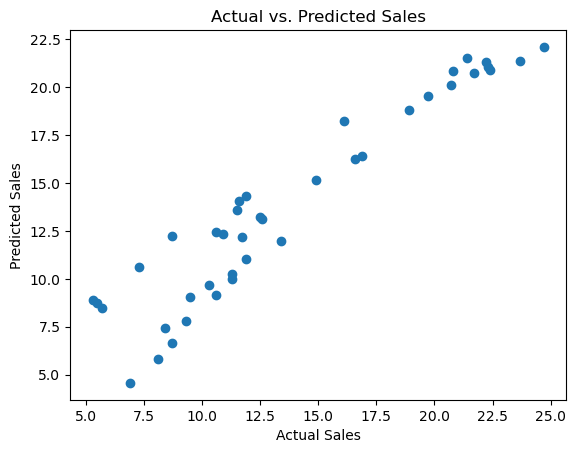

In [24]:
# Visualize predicted vs. actual sales
plt.scatter(Y_test, predictions)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()